In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import operator
import os
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 88


In [3]:
texts = os.listdir('./datasample')
#texts

In [4]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [5]:
jieba.load_userdict("add_dict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/yj/b2sj8k396ts1dld08589ctwc0000gn/T/jieba.cache
Loading model cost 0.666 seconds.
Prefix dict has been built succesfully.


In [6]:
stopWords=[]
with open('stop_dict.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [7]:
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopWords)

In [8]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#sorted(list(doc_word_frequency[7].items()) , key = lambda x: x[1] , reverse=True)[0:20] # 顯示第一篇文章的部份詞彙與對應詞頻
#for i in range (len(text_list)):
   # l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
#print(l_d)
for i in range (len(text_list)):
    l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
print(l_d)

[('深水埗', 62), ('呢', 52), ('旅館', 45), ('這個', 41), ('唐樓', 24), ('做', 21), ('知道', 20), ('自己', 20), ('阿金', 18), ('老', 18), ('麵', 17), ('對', 17), ('這麼', 17), ('沒', 17), ('設計', 16), ('闆', 16), ('一家', 16), ('一些', 16), ('之', 16), ('籠屋', 15), ('娘', 15), ('這家', 13), ('Pat', 13), ('後', 12), ('模型', 12), ('電影', 11), ('招牌', 11), ('細蓉', 10), ('東西', 10), ('咖啡', 10), ('^', 10), ('照片', 10), ('這是', 10), ('他們', 10), ('讓', 10), ('狂', 10), ('旅', 10), ('錢', 9), ('不會', 9), ('感覺', 9), ('社區', 9), ('雲', 8), ('經典', 8), ('音樂', 8), ('相信', 8), ('加上', 8), ('這種', 8), ('房間', 8), ('介紹', 7), ('故事', 7), ('Hostel', 7), ('時候', 7), ('生活', 7), ('也許', 7), ('建築', 7), ('住客', 7), ('製', 7), ('霓虹', 6), ('廳', 6), ('事', 6), ('隨性', 6), ('難', 6), ('看過', 6), ('一幢', 6), ('靈魂', 6), ('內', 6), ('藝術', 6), ('另', 6), ('作', 6), ('味道', 6), ('間', 6), ('房', 6), ('標誌', 5), ('幫', 5), ('公共', 5), ('聊天', 5), ('所', 5), ('新', 5), ('大厦', 5), ('樓', 5), ('劏', 5), ('本土', 5), ('帶', 5), ('本地', 5), ('設計師', 5), ('舖', 5), ('創作', 5), ('環境', 5), ('令', 5), ('每個', 5)

In [9]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [10]:
# 查詢斷完詞後的 list 
corpus_cut = [jieba.lcut(t) for t in corpus]
#corpus_cut

#文章數量要夠多才能用
#sorted_d = sorted(doc_word_frequency.items(), key=operator.itemgetter(1), reverse = True)

檢查字典
利用coshow

In [11]:
##a = [[1, 2], [3, 4]] 大概是這概念
cut = [i for sublist in corpus_cut for i in sublist]
new_dic = []
for i in range(len(cut) - 1):
    assemble_word = cut[i]+cut[i+1]
    new_dic.append(assemble_word)
    #print(cut[i]+cut[i+1])
#    print(assemble_word)
#    #print(new_dic)

In [12]:
#def add_word(list):
#    for items in list:
#        jieba.add_word(items)
#add_word(new_dic)
#doc_names = range(len(text_list))
#dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}
#doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
#sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)

In [13]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [14]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,甜品,Shop,十八,炒菜,大額,賣台幣,刻下,台灣會,桑莓,卡滋卡,...,再折,銀,塌,TimesSquare,完全,旁週,島我們,奸詐,折價,雜貨店
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,甜品,Shop,十八,炒菜,大額,賣台幣,刻下,台灣會,桑莓,卡滋卡,...,再折,銀,塌,TimesSquare,完全,旁週,島我們,奸詐,折價,雜貨店
0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.007610,0.0,0.000000,0.000000,0.034966,0.000000
2,0.059588,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.028363,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.023325,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.034644,0.0,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [16]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('甜品', 0.0),
 ('Shop', 0.0),
 ('十八', 0.0),
 ('炒菜', 0.0),
 ('大額', 0.0),
 ('賣台幣', 0.0),
 ('刻下', 0.0),
 ('台灣會', 0.0),
 ('桑莓', 0.0),
 ('卡滋卡', 0.0)]

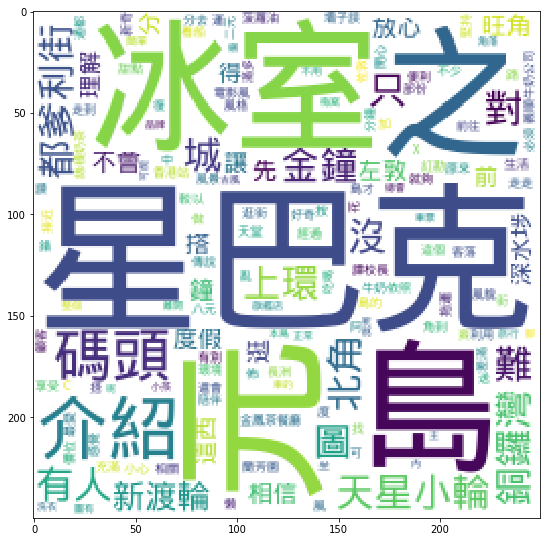

In [18]:
linux_font = r'/Users/leeyishan/Documents/GitHub/in_home/FinalProject/wqy-microhei.ttc'
#linux_font = r'/Users/Minerva/Documents/GitHub_table_computer/in_home/FinalProject/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(20, 20))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=250, width=250)


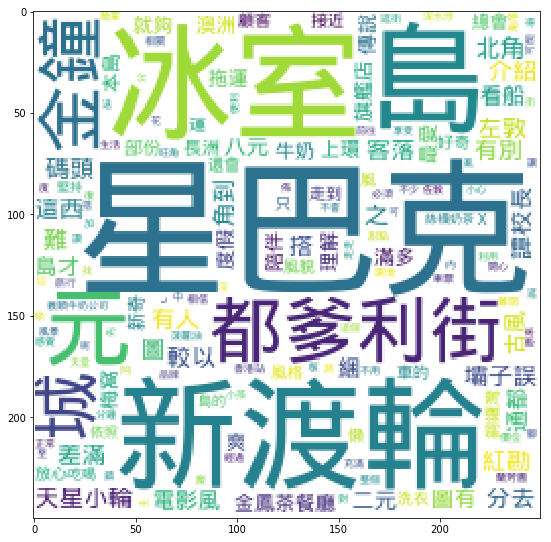

In [19]:
#修正過後
plt.figure(figsize=(20, 20))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=250, width=250)

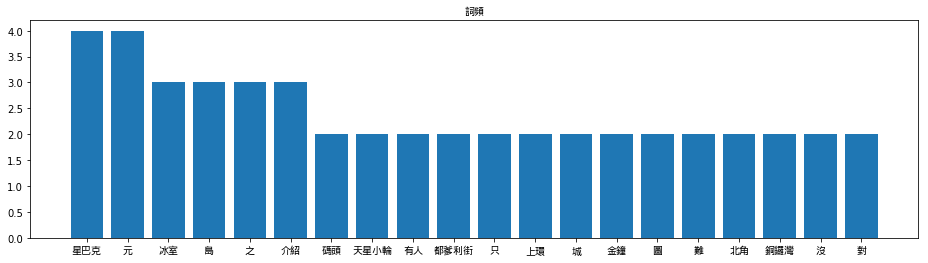

In [20]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

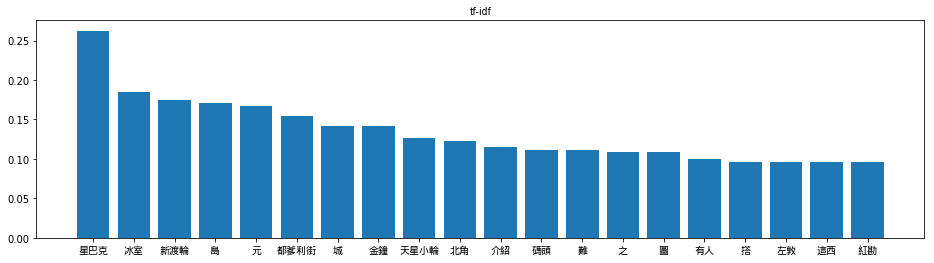

In [21]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")